In [ ]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [ ]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [ ]:
%run ../test/test_algorithms.py

In [ ]:
%run ../test/test_dataloader.py

In [ ]:
%run ../test/test_predictorsI.py

In [ ]:
%run ../test/test_predictorsII.py

## Running example of the system

In [ ]:
%run ../consensus/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(10)

In [ ]:
op0.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## First whole system test - I am alive

In [ ]:
%run ../consensus/algorithms.py
%run ../tools/dataloader.py
%run ../tools/predictorsI.py
%run ../tools/predictorsII.py
%run ../tools/predictorsIII.py

In [3]:
%run ../tools/dataloader.py

In [4]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [5]:
training = training.get_close()

In [6]:
predict = DataLoader('aapl', '2010-06-01', '2010-09-01')

In [7]:
predict = predict.get_close()

In [ ]:
def data_prep(df, input_batch_size, future_horizon):
    input_b = df[0:input_batch_size]
    real_value = df[input_batch_size:input_batch_size + future_horizon]
    
    return input_b, real_value

In [ ]:
# future_horizon = length -> days into the future predicted
def individual_predictors(training_df, input_batch, future_horizon):
    one = HybridUnivariatePredictor(training_df,2, len(input_batch), future_horizon)
    one.create_cnnlstm()
    one.fit_model(10)
    one.show_performance()
    
    two = BasicUnivariatePredictor(training_df, len(input_batch), future_horizon)
    two.create_bilstm()
    two.fit_model(10)
    two.show_performance()
    
    
    three = BasicUnivariatePredictor(training_df, len(input_batch), future_horizon)
    three.create_cnn()
    three.fit_model(10)
    three.show_performance()
    
    prediction_one = one.predict(input_batch)
    prediction_two = two.predict(input_batch)
    prediction_three = three.predict(input_batch)
    
    return prediction_one, prediction_two, prediction_three

In [8]:
predict_req, real = data_prep(predict, 24, 30)

Epoch 1/10
23/23 [==============================] - 0s 20ms/step - loss: 30.2185 - mean_squared_error: 30.2185 - val_loss: 38.6194 - val_mean_squared_error: 38.6194
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 15.8850 - mean_squared_error: 15.8850 - val_loss: 20.6386 - val_mean_squared_error: 20.6386
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 8.2345 - mean_squared_error: 8.2345 - val_loss: 8.3021 - val_mean_squared_error: 8.3021
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 2.6406 - mean_squared_error: 2.6406 - val_loss: 2.1904 - val_mean_squared_error: 2.1904
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.5599 - mean_squared_error: 0.5599 - val_loss: 0.5156 - val_mean_squared_error: 0.5156
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.1282 - mean_squared_error: 0.1282 - val_loss: 0.3616 - val_mean_squared_error: 0.3616
Epoch 7/10
23/23 [=============

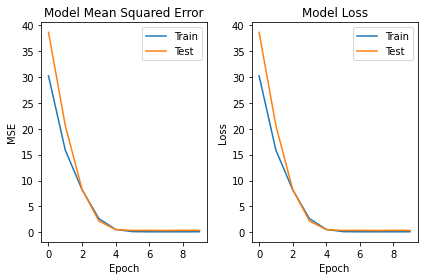

Epoch 1/10
23/23 [==============================] - 1s 36ms/step - loss: 24.3502 - mean_squared_error: 24.3502 - val_loss: 26.6441 - val_mean_squared_error: 26.6441
Epoch 2/10
23/23 [==============================] - 0s 17ms/step - loss: 9.9259 - mean_squared_error: 9.9259 - val_loss: 11.3336 - val_mean_squared_error: 11.3336
Epoch 3/10
23/23 [==============================] - 0s 16ms/step - loss: 3.0011 - mean_squared_error: 3.0011 - val_loss: 1.5995 - val_mean_squared_error: 1.5995
Epoch 4/10
23/23 [==============================] - 0s 16ms/step - loss: 0.4781 - mean_squared_error: 0.4781 - val_loss: 0.7019 - val_mean_squared_error: 0.7019
Epoch 5/10
23/23 [==============================] - 0s 16ms/step - loss: 0.1850 - mean_squared_error: 0.1850 - val_loss: 0.4890 - val_mean_squared_error: 0.4890
Epoch 6/10
23/23 [==============================] - 0s 16ms/step - loss: 0.1405 - mean_squared_error: 0.1405 - val_loss: 0.5457 - val_mean_squared_error: 0.5457
Epoch 7/10
23/23 [==========

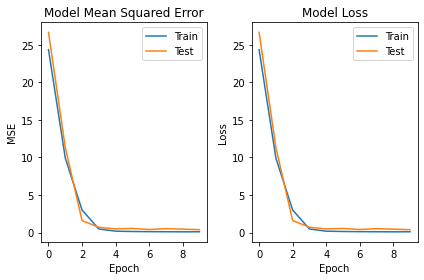

Epoch 1/10
23/23 [==============================] - 0s 7ms/step - loss: 20.8771 - mean_squared_error: 20.8771 - val_loss: 15.0496 - val_mean_squared_error: 15.0496
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 3.5272 - mean_squared_error: 3.5272 - val_loss: 1.4100 - val_mean_squared_error: 1.4100
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2663 - mean_squared_error: 0.2663 - val_loss: 0.3900 - val_mean_squared_error: 0.3900
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1272 - mean_squared_error: 0.1272 - val_loss: 0.3564 - val_mean_squared_error: 0.3564
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.3776 - val_mean_squared_error: 0.3776
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.3472 - val_mean_squared_error: 0.3472
Epoch 7/10
23/23 [==================

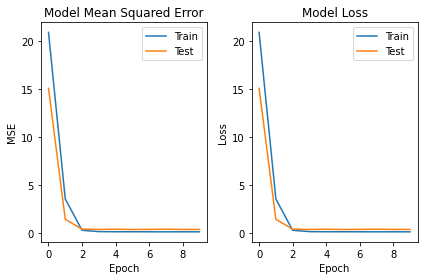

In [9]:
A, B, C = individual_predictors(training, predict_req, 30)

In [10]:
predict_req

,Close
Date,
2010-06-01,9.315357
2010-06-02,9.426786
2010-06-03,9.397143
2010-06-04,9.141429
2010-06-07,8.962143
2010-06-08,8.904643
2010-06-09,8.685714
2010-06-10,8.946786
2010-06-11,9.053929


In [11]:
real

,Close
Date,
2010-07-06,8.879643
2010-07-07,9.238214
2010-07-08,9.217500
2010-07-09,9.272143
2010-07-12,9.188929
2010-07-13,8.992857
2010-07-14,9.026071
2010-07-15,8.980357
2010-07-16,8.925000


In [12]:
final_df = pd.concat([A, B, C], axis=1)

In [13]:
final_df

,CNN-LSTM,Bidirectional LSTM,CNN
0,9.287659,8.242499,9.132840
1,9.083828,7.386859,9.106056
2,9.339325,10.484982,9.327177
3,8.999104,8.406292,9.585896
4,9.066397,8.499037,9.370701
5,9.017179,10.205279,9.217038
6,9.173689,7.068573,9.549628
7,9.115103,6.754462,9.745355
8,9.211923,7.517200,9.533031
9,9.247984,6.881120,9.438820


### System Disagreement

In [ ]:
def system_disagreement(df):
    disagreement(df).plot()
    predictor_score(df).plot()

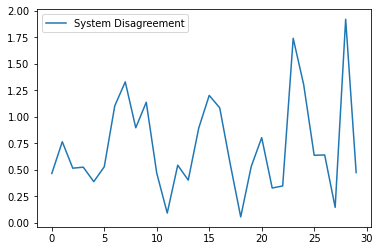

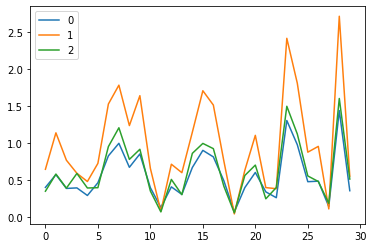

In [14]:
system_disagreement(final_df)

In [15]:
disagreement(final_df)

,System Disagreement
0,0.464515
1,0.764087
2,0.514580
3,0.524269
4,0.387406
5,0.528045
6,1.102691
7,1.329286
8,0.895925
9,1.136756


In [16]:
predictor_score(final_df)

,0,1,2
0,0.399993,0.645167,0.348386
1,0.573066,1.138722,0.580475
2,0.385935,0.767820,0.389984
3,0.393202,0.590805,0.588799
4,0.290555,0.479675,0.391989
5,0.462653,0.725447,0.396034
6,0.827019,1.528724,0.952332
7,0.996964,1.783845,1.207048
8,0.671944,1.236851,0.778980
9,0.852567,1.641521,0.916179


### System consensus

In [ ]:
def consensus(df, real):
    consensus = pd.DataFrame()
    
    average = average_consolidation(final_df)
    nomemory = consolidated_predictions(final_df, real)
    memory = consolidated_predictions_memory(final_df, real)
    focus = consolidated_predictions_focused(final_df, real)
    anchor = consolidated_predictions_anchor(final_df, real, 1.5)
    
    consensus['Average'] = average
    consensus['NoMemory'] = nomemory
    consensus['Memory'] = memory
    consensus['Focus'] = focus
    consensus['Anchor'] = anchor
    
    return consensus

In [19]:
algos = consensus(final_df, real)

In [20]:
performance = real.copy()

In [21]:
algos

,Average,NoMemory,Memory,Focus,Anchor
0,8.887666,8.887666,8.887666,8.887666,8.943147
1,8.525581,8.660668,8.593125,9.106056,8.542640
2,9.717161,9.410403,9.584574,9.327177,9.959207
3,8.997097,9.225256,9.135331,9.585896,8.894904
4,8.978711,9.071094,9.085788,9.066397,9.029462
5,9.479832,9.280665,9.314705,9.017179,9.596665
6,8.597297,9.153775,8.976479,9.173689,8.521952
7,8.538306,9.066095,8.990916,9.115103,8.747580
8,8.754051,9.089261,9.070990,9.211923,8.871062
9,8.522641,8.858272,8.937312,9.247984,8.612611


In [22]:
real_value = real.copy()
real_value

,Close
Date,
2010-07-06,8.879643
2010-07-07,9.238214
2010-07-08,9.217500
2010-07-09,9.272143
2010-07-12,9.188929
2010-07-13,8.992857
2010-07-14,9.026071
2010-07-15,8.980357
2010-07-16,8.925000


In [ ]:
def evaluation_frame(algorithms, real_df):
    algorithms = algorithms.set_index(real_df.index)
    algorithms['Real Value'] = real_df
    
    return algorithms

In [23]:
evaluation = evaluation_frame(algos, real_value)

In [24]:
evaluation2 = evaluation_frame(final_df, real_value)

In [25]:
evaluation2

,CNN-LSTM,Bidirectional LSTM,CNN,Real Value
Date,,,,
2010-07-06,9.287659,8.242499,9.132840,8.879643
2010-07-07,9.083828,7.386859,9.106056,9.238214
2010-07-08,9.339325,10.484982,9.327177,9.217500
2010-07-09,8.999104,8.406292,9.585896,9.272143
2010-07-12,9.066397,8.499037,9.370701,9.188929
2010-07-13,9.017179,10.205279,9.217038,8.992857
2010-07-14,9.173689,7.068573,9.549628,9.026071
2010-07-15,9.115103,6.754462,9.745355,8.980357
2010-07-16,9.211923,7.517200,9.533031,8.925000


In [ ]:
def calculate_error_predictors(data):
    error = data.copy()
    
    error['Error CNN-LSTM'] = abs(error['Real Value'] - error['CNN-LSTM'])
    error['Error Bidirectional LSTM'] = abs(error['Real Value'] - error['Bidirectional LSTM'])
    error['Error CNN'] = abs(error['Real Value'] - error['CNN'])
    
    return error

In [26]:
nice1 = calculate_error_predictors(evaluation2)

In [27]:
print('-----SUM--------')
print(nice1['Error CNN-LSTM'].sum())
print(nice1['Error Bidirectional LSTM'].sum())
print(nice1['Error CNN'].sum())
print('------Average-------')
print(nice1['Error CNN-LSTM'].mean())
print(nice1['Error Bidirectional LSTM'].mean())
print(nice1['Error CNN'].mean())
print('-------Median-------')
print(nice1['Error CNN-LSTM'].median())
print(nice1['Error Bidirectional LSTM'].median())
print(nice1['Error CNN'].median())

-----SUM--------
9.476469039916992
41.81840419769287
16.990406036376953
------Average-------
0.3158823013305664
1.3939468065897624
0.5663468678792317
-------Median-------
0.25266027450561523
1.3259763717651367
0.5539751052856445


In [ ]:
def calculate_error_algorithms(data):
    error = data.copy()
    
    error['Error Average'] = abs(error['Real Value'] - error['Average'])
    error['Error NoMemory'] = abs(error['Real Value'] - error['NoMemory'])
    error['Error Memory'] = abs(error['Real Value'] - error['Memory'])
    error['Error Focus'] = abs(error['Real Value'] - error['Focus'])
    error['Error Anchor'] = abs(error['Real Value'] - error['Anchor'])
    
    return error



In [28]:
nice = calculate_error_algorithms(evaluation)

In [29]:
print('----------SUM------------')
print(nice['Error Average'].sum())
print(nice['Error NoMemory'].sum())
print(nice['Error Memory'].sum())
print(nice['Error Focus'].sum())
print(nice['Error Anchor'].sum())
print('----------Average--------')
print(nice['Error Average'].mean())
print(nice['Error NoMemory'].mean())
print(nice['Error Memory'].mean())
print(nice['Error Focus'].mean())
print(nice['Error Anchor'].mean())
print('---------Median----------')
print(nice['Error Average'].median())
print(nice['Error NoMemory'].median())
print(nice['Error Memory'].median())
print(nice['Error Focus'].median())
print(nice['Error Anchor'].median())

----------SUM------------
14.400064786275225
11.488256500466385
10.21262970491938
12.506279309590658
13.77952733343933
----------Average--------
0.4800021595425075
0.38294188334887946
0.3404209901639793
0.41687597698635526
0.459317577781311
---------Median----------
0.4765330950419111
0.27648401049583704
0.24248400824156668
0.3003377914428711
0.4219423114102536


In [ ]:
def plot_performance(data):

    plt.plot(data['Real Value'])
    plt.plot(data['Average'])
    plt.title('Average Algorithm Error')
    plt.ylabel('Absolute Error')
    plt.xlabel('Time')
    plt.legend(['Real Value', 'Consensus'], loc='upper right')
    plt.show()
    
    plt.plot(data['Real Value'])
    plt.plot(data['NoMemory'])
    plt.title('NoMemory Algorithm Error')
    plt.ylabel('Absolute Error')
    plt.xlabel('Time')
    plt.legend(['Real Value', 'Consensus'], loc='upper right')
    plt.show()
    
    plt.plot(data['Real Value'])
    plt.plot(data['Memory'])
    plt.title('Memory Algorithm Error')
    plt.ylabel('Absolute Error')
    plt.xlabel('Time')
    plt.legend(['Real Value', 'Consensus'], loc='upper right')
    plt.show()
    
    plt.plot(data['Real Value'])
    plt.plot(data['Focus'])
    plt.title('Focus Algorithm Error')
    plt.ylabel('Absolute Error')
    plt.xlabel('Time')
    plt.legend(['Real Value', 'Consensus'], loc='upper right')
    plt.show()
    
    plt.plot(data['Real Value'])
    plt.plot(data['Anchor'])
    plt.title('Anchor Algorithm Error')
    plt.ylabel('Absolute Error')
    plt.xlabel('Time')
    plt.legend(['Real Value', 'Consensus'], loc='upper right')
    plt.show()

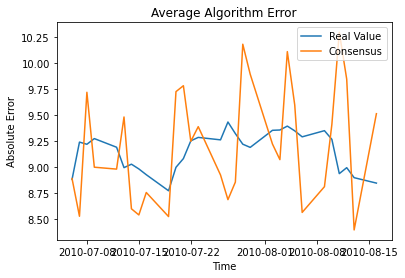

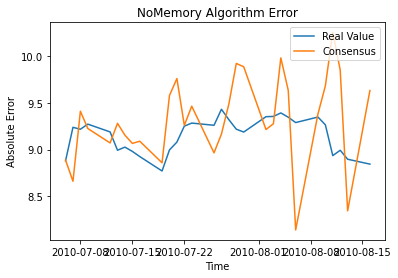

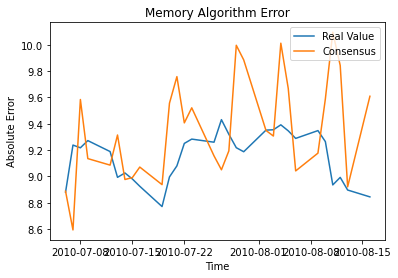

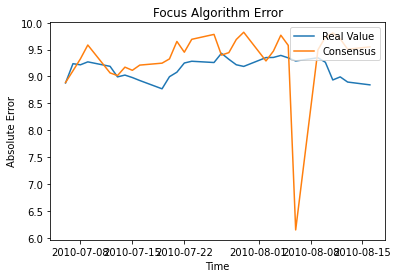

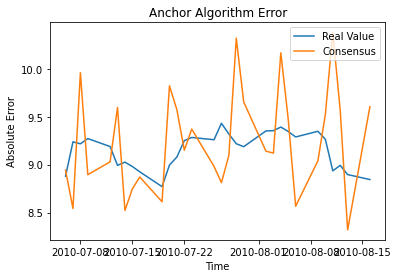

In [30]:
plot_performance(nice)

In [18]:
%run ../system/activate.py